```
[Title] Autoencoder using Tensorflow.Keras
[Author] Yibeck Lee(yibec.Lee@gmail.com)
[Contents]
 - Aucoencoder for Dimension Reduction
[References]
 - https://towardsdatascience.com/pca-vs-autoencoders-1ba08362f450
 - https://medium.com/datadriveninvestor/deep-autoencoder-using-keras-b77cd3e8be95
```

In [1]:
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np

Using TensorFlow backend.


In [4]:
trainFeatures = np.array([
  [1,1,1]
, [1,1,1]
, [1,1,1]
, [1,1,1]
, [1,2,3]
, [2,2,2]
, [2,2,2]
, [2,2,2]
, [2,2,2]
, [1,3,5]
])
print(trainFeatures)

[[1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 2 3]
 [2 2 2]
 [2 2 2]
 [2 2 2]
 [2 2 2]
 [1 3 5]]


In [5]:
encoding_dim = 2
input_img = Input(shape=(3,))
encoded = Dense(encoding_dim)(input_img)
decoded = Dense(3)(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='mse')

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
autoencoder.fit(trainFeatures, trainFeatures,
                epochs=100,
                batch_size=2,
                verbose=1,
                shuffle=True)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
10/10 [==============================] - 0s 24ms/step - loss: 4.5258
Epoch 2/100
10/10 [==============================] - 0s 0us/step - loss: 4.4272
Epoch 3/100
10/10 [==============================] - 0s 0us/step - loss: 4.3374
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 4.2539
Epoch 5/100
10/10 [==============================] - 0s 0us/step - loss: 4.1768
Epoch 6/100
10/10 [==============================] - 0s 0us/step - loss: 4.1035
Epoch 7/100
10/10 [==============================] - 0s 0us/step - loss: 4.0355
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 3.9702
Epoch 9/100
10/10 [==============================] - 0s 400us/step - loss: 3.9077
Epoch 10/100
10/10 [==============================] - 0s 300us/step - loss: 3.8494
Epoch 11/100
10/10 [==============================] - 0s 400us/step - loss: 3.7944
Epoch 12/100
10/10 [==============================] - 0s 400us/

In [7]:
decoded_imgs = autoencoder.predict(trainFeatures)

In [8]:
decoded_imgs

array([[1.1095318, 1.1637223, 1.3820477],
       [1.1095318, 1.1637223, 1.3820477],
       [1.1095318, 1.1637223, 1.3820477],
       [1.1095318, 1.1637223, 1.3820477],
       [1.1302338, 1.6949943, 1.4482573],
       [1.9285399, 1.6084877, 2.303241 ],
       [1.9285399, 1.6084877, 2.303241 ],
       [1.9285399, 1.6084877, 2.303241 ],
       [1.9285399, 1.6084877, 2.303241 ],
       [1.1509358, 2.2262664, 1.5144668]], dtype=float32)

In [9]:
error = trainFeatures - decoded_imgs

In [10]:
error_square = error**2
error_square

array([[1.19972065e-02, 2.68049839e-02, 1.45960409e-01],
       [1.19972065e-02, 2.68049839e-02, 1.45960409e-01],
       [1.19972065e-02, 2.68049839e-02, 1.45960409e-01],
       [1.19972065e-02, 2.68049839e-02, 1.45960409e-01],
       [1.69608335e-02, 9.30284585e-02, 2.40790532e+00],
       [5.10654987e-03, 1.53281861e-01, 9.19551129e-02],
       [5.10654987e-03, 1.53281861e-01, 9.19551129e-02],
       [5.10654987e-03, 1.53281861e-01, 9.19551129e-02],
       [5.10654987e-03, 1.53281861e-01, 9.19551129e-02],
       [2.27816064e-02, 5.98663708e-01, 1.21489419e+01]])

In [11]:
error_square = np.sum(error_square, axis=1)
error_square

array([ 0.1847626 ,  0.1847626 ,  0.1847626 ,  0.1847626 ,  2.51789461,
        0.25034352,  0.25034352,  0.25034352,  0.25034352, 12.77038726])

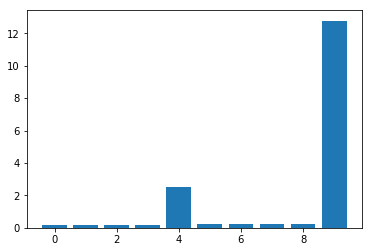

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
ind = np.arange(10) 
plt.bar(ind, error_square)
plt.show()